In [1]:
import pandas as pd


df = pd.read_csv('feature_extracted_plate.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,plate,date,price,price_Box-Cox,price_Yeo-Johnson,price_Quantile,price_log,plate_length,region,registration_code,...,series_part_2_YC,series_part_2_YE,series_part_2_YH,series_part_2_YK,series_part_2_YM,series_part_2_YO,series_part_2_YP,series_part_2_YT,series_part_2_YX,series_part_2_YY
0,X059CP797,2024-12-26 00:00:00,65000,-0.903094,-0.903096,-0.817902,11.082158,9,797,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Y800MH790,2024-07-12 21:31:37,100000,-0.440378,-0.440380,-0.370902,11.512935,9,790,800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A212TX77,2024-04-18 00:00:00,290000,0.532677,0.532678,0.468203,12.577640,8,77,212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,P001AY199,2025-01-03 00:27:15,680000,1.196486,1.163831,1.149742,13.429850,9,199,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B400BB750,2022-04-09 00:00:00,50000,-1.207010,-1.207011,-1.184447,10.819798,9,750,400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
unique_series_sorted = sorted(df['series'].unique())
series2idx = {series: idx for idx, series in enumerate(unique_series_sorted)}

In [3]:
len(unique_series_sorted)

1728

In [4]:
df.columns[:48]

Index(['plate', 'date', 'price', 'price_Box-Cox', 'price_Yeo-Johnson',
       'price_Quantile', 'price_log', 'plate_length', 'region',
       'registration_code', 'series_part_1', 'series_part_2', 'series',
       'region_name', 'region_id_normal', 'region_id_Box-Cox',
       'region_id_Yeo-Johnson', 'region_id_Quantile', 'region_id_log',
       'region_avg_price', 'region_avg_Box-Cox', 'region_avg_Yeo-Johnson',
       'region_avg_Quantile', 'region_avg_log', 'digit_symmetry',
       'registration_symmetry', 'region_symmetry', 'digits_frequency',
       'region_frequency', 'registration_frequency', 'series_symmetry', 'year',
       'month', 'day', 'hour', 'day_of_week', 'is_prestigious_number',
       'is_prestigious_letter', 'series_part_1_A', 'series_part_1_B',
       'series_part_1_C', 'series_part_1_E', 'series_part_1_H',
       'series_part_1_K', 'series_part_1_M', 'series_part_1_O',
       'series_part_1_P', 'series_part_1_T'],
      dtype='object')

## Visualization
getting distribution for each of the characters for each index.

the problem is with different fold i have so much variance in the validation loss.

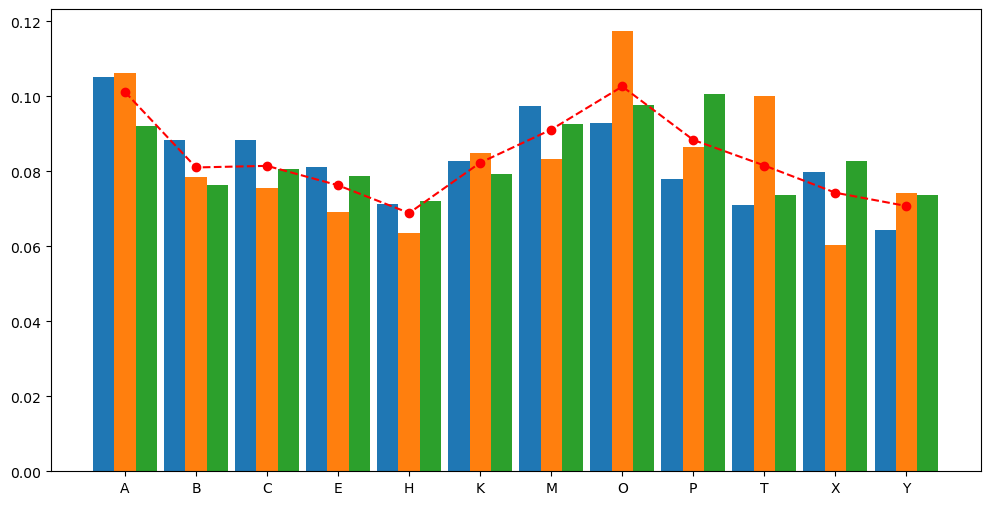

In [221]:
from matplotlib import pyplot as plt
import numpy as np


series_count_1 = df['series'].str[0].value_counts(normalize=True).sort_index()
series_count_2 = df['series'].str[1].value_counts(normalize=True).sort_index()
series_count_3 = df['series'].str[2].value_counts(normalize=True).sort_index()

mean_count_char = pd.DataFrame({1: series_count_1, 2: series_count_2, 3: series_count_3}).T.mean().to_list()

x = np.arange(12)
width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(x-0.3, series_count_1, width)
ax.plot(x, mean_count_char, 'ro--')
ax.bar(x, series_count_2, width)
ax.bar(x+0.3, series_count_3, width)

ax.set_xticks(
    ticks=x,
    labels=['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y']
)

# Embedding layer training

In [57]:
char_plate = ['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y']
char2idx = {char: idx for idx, char in enumerate(char_plate)}
char2idx

{'A': 0,
 'B': 1,
 'C': 2,
 'E': 3,
 'H': 4,
 'K': 5,
 'M': 6,
 'O': 7,
 'P': 8,
 'T': 9,
 'X': 10,
 'Y': 11}

In [116]:

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(3, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            nn.ReLU(),  
        )

    def forward(self, x):
        out = self.encoder(x)
        return self.decoder(out)

In [124]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import KFold

class SeriesDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor([char2idx[char] for char in self.data[idx]], dtype=torch.float32)


dataset = SeriesDataset(unique_series_sorted)
batch_size = 128
k_folds = 12

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [126]:
import torch.optim as optim

num_epochs = 500


for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f'\n=== Fold {fold+1} ===')
    
    # Create subset loaders
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)
    
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    
    # Initialize model, loss, optimizer (re-init for each fold)
    model = Autoencoder()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs in train_loader:
            targets = inputs.clone()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_subset)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs in val_loader:
                targets = inputs.clone()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_subset)

        print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


=== Fold 1 ===
Epoch [1/500] Train Loss: 40.9978, Val Loss: 42.7865
Epoch [2/500] Train Loss: 40.9595, Val Loss: 42.7468
Epoch [3/500] Train Loss: 40.9214, Val Loss: 42.7056
Epoch [4/500] Train Loss: 40.8809, Val Loss: 42.6607
Epoch [5/500] Train Loss: 40.8356, Val Loss: 42.6080
Epoch [6/500] Train Loss: 40.7814, Val Loss: 42.5456
Epoch [7/500] Train Loss: 40.7122, Val Loss: 42.4435
Epoch [8/500] Train Loss: 40.5798, Val Loss: 42.2659
Epoch [9/500] Train Loss: 40.3791, Val Loss: 41.9642
Epoch [10/500] Train Loss: 39.9590, Val Loss: 41.2500
Epoch [11/500] Train Loss: 38.9307, Val Loss: 39.5338
Epoch [12/500] Train Loss: 36.6527, Val Loss: 35.8486
Epoch [13/500] Train Loss: 32.3928, Val Loss: 30.1150
Epoch [14/500] Train Loss: 27.6495, Val Loss: 26.1733
Epoch [15/500] Train Loss: 25.1278, Val Loss: 23.9509
Epoch [16/500] Train Loss: 23.1602, Val Loss: 22.4162
Epoch [17/500] Train Loss: 21.7811, Val Loss: 21.2337
Epoch [18/500] Train Loss: 20.8511, Val Loss: 20.5656
Epoch [19/500] Train 

In [132]:
model.eval()

x = torch.tensor([[char2idx[char] for char in 'ABC']], dtype=torch.float32)
y = model(x)
y

tensor([[0.0538, 1.0648, 0.0000]], grad_fn=<ReluBackward0>)

In [154]:
predicted_idxs.unsqueeze(0)

tensor([[[0., 0., 0.]]])

In [164]:
model.eval()
idx2char = {v: k for k, v in char2idx.items()}
wrong_predictions = []

with torch.no_grad():
    for token in unique_series_sorted:
        input_tensor = torch.tensor([[char2idx[char] for char in token]], dtype=torch.float32)

        output = model(input_tensor)
        predicted_idxs = torch.round(output).squeeze(0).detach().numpy()
        predicted_token = ''.join(idx2char[i] for i in predicted_idxs)

        if predicted_token != token:
            print(f'token: {token}, predicted: {predicted_token}')

token: AAB, predicted: AAA
token: AAC, predicted: AAA
token: AAE, predicted: AAA
token: AAH, predicted: AAA
token: AAK, predicted: AAA
token: AAM, predicted: AAA
token: AAO, predicted: AAA
token: AAP, predicted: AAA
token: AAT, predicted: AAA
token: AAX, predicted: AAA
token: AAY, predicted: AAA
token: ABB, predicted: ABA
token: ABC, predicted: ABA
token: ABE, predicted: ABA
token: ABH, predicted: ABA
token: ABK, predicted: ABA
token: ABM, predicted: ABA
token: ABO, predicted: ABA
token: ABP, predicted: ABA
token: ABT, predicted: ABA
token: ABX, predicted: ABA
token: ABY, predicted: ABA
token: ACB, predicted: ACA
token: ACC, predicted: ACA
token: ACE, predicted: ACA
token: ACH, predicted: ACA
token: ACK, predicted: ACA
token: ACM, predicted: ACA
token: ACO, predicted: ACA
token: ACP, predicted: ACA
token: ACT, predicted: ACA
token: ACX, predicted: ACA
token: ACY, predicted: ACA
token: AEB, predicted: AEA
token: AEC, predicted: AEA
token: AEE, predicted: AEA
token: AEH, predicted: AEA
t

In [104]:
model.eval()
wrong_predictions = []

idx2series = {v: k for k, v in series2idx.items()}

with torch.no_grad():
    for token in unique_series_sorted:
        true_idx = series2idx[token]
        input_tensor = torch.tensor([[true_idx]], dtype=torch.float32)  # shape: [1, 1]

        output = model(input_tensor)
        predicted_idx = int(torch.round(output).item())  # round to nearest index

        # Clamp to valid index range
        predicted_idx = max(0, min(predicted_idx, len(idx2series) - 1))

        if predicted_idx != true_idx:
            predicted_token = idx2series[predicted_idx]
            wrong_predictions.append((token, predicted_token))

# Show results
print(f"Total wrong predictions: {len(wrong_predictions)} / {len(unique_series_sorted)}\n")
for true_token, predicted_token in wrong_predictions:
    print(f"{true_token} ➜ {predicted_token}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 3x8)

In [446]:

with torch.no_grad():
    input_tensor = torch.tensor([[series2idx['AAC']]], dtype=torch.float32)
    
    out = model(input_tensor)
    print(torch.round(out).item())

2.0


In [448]:
out

tensor([[1.9967]])